# Итоговая работа.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import derivative
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline

## Задание 1


Вычислите производную функции:

$tg^2(sin(x) + cos(2x+3))$

в точке $x_0=1$


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.misc import derivative
from scipy.optimize import differential_evolution
from scipy.optimize import minimize
from scipy.stats import norm
%matplotlib inline
### YOUR CODE HERE
def f(x):
  return np.tan(np.sin(x)+np.cos(2*x + 3))**2
y = derivative(f,1,dx=1e-6)
y

<ipython-input-5-02a9495fe2d2>:11: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  y = derivative(f,1,dx=1e-6)


55.3859176464222

Дан объект в $2D$ пространстве

## Задание 2

(-200.0, 200.0)

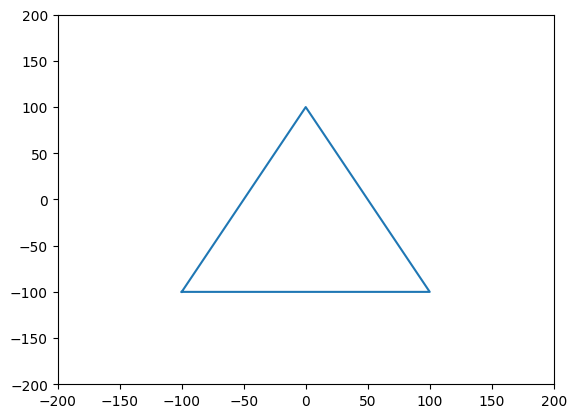

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

При помощи матричных операций выполните:
- Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)


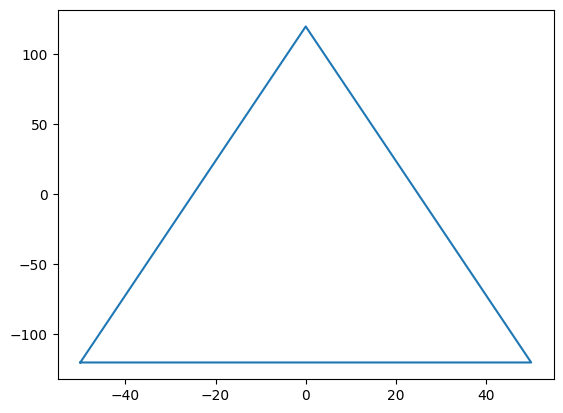

In [ ]:
#your code here
aa=np.array([[0.5,0,0],[0,1.2,0]])
res = np.dot(aa,A.transpose())
res = res.transpose()
b = np.array(res)

x = b[:,0]
y = b[:,1]
plt.plot(x, y)

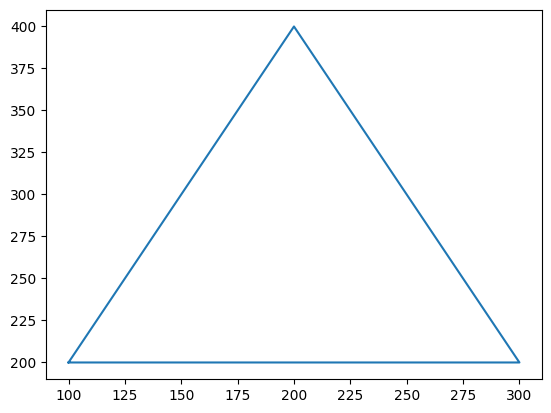

In [ ]:
b=np.array([[200,300,1]])
res = A+b
b1 = res

x = b1[:,0]
y = b1[:,1]
plt.plot(x, y)

## Задание 3


Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
### YOUR CODE HERE
z = np.linalg.eig(m)
znach = z[0]
vektor1 = np.transpose(z[1])[0]/0.4472136
vektor2 = np.transpose(z[1])[1]/0.4472136
print('Собств. значения:', znach,
      '\n Собств. вектор 1:', vektor1,
      '\n Собств. вектор 2:', vektor2)

Собств. значения: [ 3. -1.] 
 Собств. вектор 1: [1.99999998 0.99999999] 
 Собств. вектор 2: [-1.99999998  0.99999999]


## Задание 4


Дана функция с неизвестными параметрами a и b, вам также известны значения функции `fx` в точках `x`.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку `error`.


In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

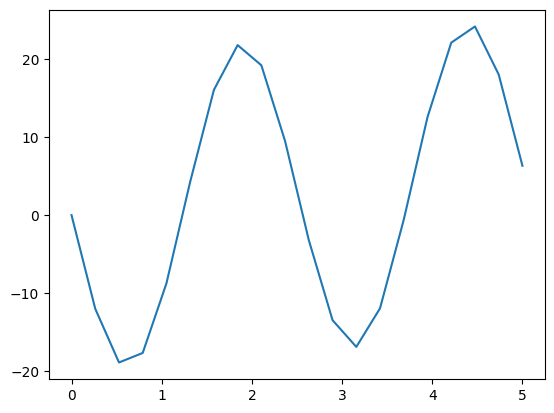

In [ ]:
plt.plot(x, fx)
plt.show()

In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [ ]:
xx = np.random.uniform(low = 0 ,high=3,size=(10,))

In [ ]:
### YOUR CODE HERE
from scipy.optimize import curve_fit, minimize
r1,r2 =curve_fit(f,x,y)
#x0 = np.array([0.5,1])
x0=xx
a, b = r1


In [ ]:
res1 = minimize(error,x0,args=(x0,r1),method='COBYLA')

TypeError: ignored

## Задание 5



Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [ ]:
import numpy as np
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
from pandas.io.gbq import read_gbq
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics import pairwise_distances
ik  = []
for i in raitings:
  x = i
  i1=[]
  for ii in raitings:
    i!=ii
    kk = np.rad2deg(np.arccos(np.dot(i,ii)/(np.linalg.norm(i)*np.linalg.norm(ii))))
    i1.append(kk)
  ik.append(i1)
ik = np.nan_to_num(np.array(ik))
ll = pairwise_distances(ik)
ll = ll.tolist()
res = []
for kk in ll:
  x = ll.index(kk)
  mk = []
  for kl in kk:
    if kl != 0:
      mk.append(kl)
  y = mk.index(min(mk))
  er = ['user ', y+1,'is similar',x+1]
  res.append(er)
res

<ipython-input-16-f95f9b331064>:10: RuntimeWarning: invalid value encountered in arccos
  kk = np.rad2deg(np.arccos(np.dot(i,ii)/(np.linalg.norm(i)*np.linalg.norm(ii))))


[['user ', 8, 'is similar', 1],
 ['user ', 4, 'is similar', 2],
 ['user ', 9, 'is similar', 3],
 ['user ', 2, 'is similar', 4],
 ['user ', 8, 'is similar', 5],
 ['user ', 7, 'is similar', 6],
 ['user ', 7, 'is similar', 7],
 ['user ', 6, 'is similar', 8],
 ['user ', 1, 'is similar', 9],
 ['user ', 3, 'is similar', 10]]